# K-nearest neighbors na Regressão
   Assim como antes nos problemas de classificação podemos utilizar a distância euclidiana para calcular a distância entre as instâncias porem a diferença reside na forma em que será calculado o valor para se associar a instância que está sendo testada.
   Invés de usarmos aquela classe que aparece com mais frequência(classe dominante) no vetor dos vizinhos mais próximos, pegaremos uma média dos valores dessas instâncias. A saída é um valor numérico. Este valor será uma medida de posição dos valores dos seus vizinhos mais próximos, por exemplo a média ou mediana.

In [18]:
import pandas as pd
dataset_train = pd.read_csv('../../data/modified/blogData_newTrainET.csv') # Importing train dataframe
dataset_test = pd.read_csv('../../data/modified/blogData_newTestET.csv') # Importing test dataframe

In [19]:
# select test data
x_test = dataset_test.iloc[:, 0:-1] # all coluns
y_test = dataset_test.iloc[:,-1] # last column of data frame

# select train data
x_train = dataset_train.iloc[:,0:-1] # all coluns
y_train = dataset_train.iloc[:,-1] # last column of data frame

In [20]:
print("Train: % " + str(len(x_train)/(len(x_train) + len(x_test)))) # % de treino
print("Test: % " + str(len(x_test)/(len(x_train) + len(x_test)))) # % de teste

Train: % 0.8729777911064461
Test: % 0.12702220889355392


## Definindo o melhor K para o KNN

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import time

init = time.time() # initial time point

# Search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsRegressor with k neighbours
    knn = KNeighborsRegressor(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsRegressor with k neighbours
    scores = cross_val_score(knn, x_test, y_test, cv=10, scoring='r2')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print('Execution time: {} seconds'.format(str(time.time() - init)))
print('K Scores List' + str(k_scores))

print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Execution time: 34.945136308670044 seconds
K Scores List[-0.26176602299649004, 0.10436271289803885, 0.2341841971318742, 0.2620089289806743, 0.30628643092411834, 0.3367006620365746, 0.361723872660865, 0.3569213072827564, 0.36890526172586746, 0.37094991679742695, 0.37910836450160734, 0.3800682466924493, 0.37326201997237407, 0.36193668706478427, 0.3624370377823212, 0.3577954992277407, 0.3584043230070944, 0.3553498276070326, 0.3571070349556686, 0.3499540317003761, 0.35243565732994436, 0.34788829850475744, 0.348569481441139, 0.34618220315158393, 0.34390412473615795, 0.3407459017454542, 0.3403697223833817, 0.33796310246041816, 0.3347974780457358, 0.334279476651711]
Length of list 30
Max of list 0.3800682466924493


## Exibindo os valores de K em relação aos score's

Text(0,0.5,'Cross-validated R2')

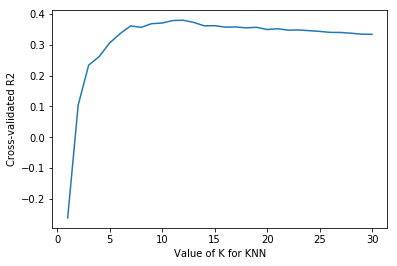

In [22]:
# plot how score changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the r2 cross-validated (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN') # Set x label
plt.ylabel('Cross-validated R2') # Set y label

### Aplicando o Knn Regressor com o "K" que contém o maior score. Aproximadamente entre o 12 e o 13

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import time

init = time.time()

neigh = KNeighborsRegressor(n_neighbors=13)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
cv = cross_val_score(neigh,x_test, y_test,scoring='r2')
neigh_score = neigh.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)

print('Execution time: {} seconds'.format(str(time.time() - init)))
print('R2 score: {}'.format(neigh_score))
print(cv)
print('MAE: {}'.format(mae))

Execution time: 7.162760972976685 seconds
R2 score: 0.3988047414083613
[0.4354624  0.31346448 0.35831882]
MAE: 5.2783517636613135


## K Fold

In [24]:
import numpy as np

k = 10  # 10-fold
scores = cross_val_score(neigh,x_test, y_test,cv= k)
print(scores)
hite_rate = np.mean(scores) 
print("Mean : " + str(hite_rate))

[0.48822455 0.16465405 0.59684472 0.37562492 0.41177924 0.13591754
 0.36138555 0.33685335 0.39737782 0.46395845]
Mean : 0.3732620199723741


## Predições em relação ao resultado original

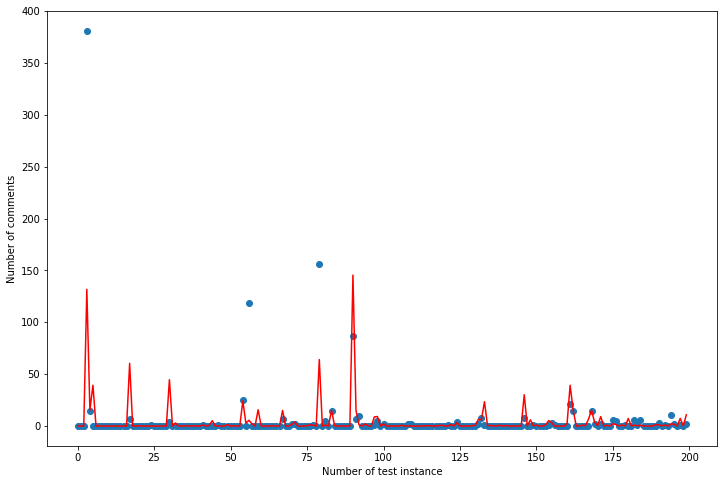

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl

x = np.arange(200)
mpl.rcParams['figure.figsize'] = (12, 8)

plt.scatter(x, y_test[:200])
plt.plot(x, y_pred[:200], color='red')
plt.xlabel('Number of test instance') # Set x label
plt.ylabel('Number of comments') # Set y label
plt.show()